In [217]:
import numpy as np
from scipy import interpolate
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests import get
import json
from collections import Counter
import re
import os
from dateutil.parser import parse
import operator
from uuid import uuid4
import sys
import geopandas
import shapefile
import probscale

from regressors import stats

In [66]:
from sklearn import metrics, linear_model
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro

In [307]:
#load in data
landdata_location = 'data/joined_drage_16_3.csv'
cropdata_location = 'data/cacropyielddata.csv'
soildata_location1 = 'data/soil_data_east.csv'

ld = pd.read_csv(landdata_location)


/Users/d/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (42,46,50,51,57,93,103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [224]:
#check out which columns have values, drop the columns with no values
columns = ld.columns.tolist()

i = 0
for c in columns:
    
    nonan = len(ld[c].dropna().tolist())
    print(i, c,':',nonan)
    i+=1
    
    if nonan == 0:
        #print('Dropped:', c)
        ld.drop(c, inplace=True, axis=1)
        
  

0 geoid : 384692
1 sourceagen : 0
2 parcelnumb : 384560
3 usecode : 363097
4 usedesc : 0
5 zoning : 0
6 zoning_des : 0
7 struct : 0
8 multistruc : 0
9 structno : 0
10 yearbuilt : 0
11 numstories : 0
12 numunits : 0
13 structstyl : 0
14 parvaltype : 0
15 improvval : 363080
16 landval : 363080
17 parval : 363080
18 agval : 0
19 saleprice : 0
20 saledate : 0
21 taxamt : 0
22 owntype : 0
23 owner : 369485
24 ownfrst : 0
25 ownlast : 0
26 owner2 : 74581
27 owner3 : 0
28 owner4 : 0
29 subsurfown : 0
30 subowntype : 0
31 mailadd : 363112
32 mail_addre : 0
33 careof : 0
34 mail_addno : 0
35 mail_addpr : 0
36 mail_addst : 0
37 mail_add_1 : 0
38 mail_add_2 : 0
39 mail_unit : 0
40 mail_city : 355923
41 mail_state : 357165
42 mail_zip : 357168
43 mail_urban : 0
44 address : 359309
45 address2 : 0
46 saddno : 359309
47 saddpref : 282571
48 saddstr : 359309
49 saddsttyp : 358009
50 saddstsuf : 1387
51 sunit : 6604
52 scity : 359309
53 original_a : 359217
54 city : 384692
55 county : 384692
56 state2

In [225]:
ld.columns.tolist()

['geoid',
 'parcelnumb',
 'usecode',
 'improvval',
 'landval',
 'parval',
 'owner',
 'owner2',
 'mailadd',
 'mail_city',
 'mail_state',
 'mail_zip',
 'address',
 'saddno',
 'saddpref',
 'saddstr',
 'saddsttyp',
 'saddstsuf',
 'sunit',
 'scity',
 'original_a',
 'city',
 'county',
 'state2',
 'szip',
 'address_so',
 'legaldesc',
 'path',
 'll_uuid',
 'll_updated',
 'homeowner_',
 'lot_area',
 'pers_prop_',
 'tax_area_c',
 'contract_n',
 'contract_y',
 'non_renewa',
 'use_high_b',
 'use_second',
 'qoz',
 'qoz_tract',
 'll_gisacre',
 'OBJECTID_1',
 'DWR_revise',
 'Symb_class',
 'MULTIUSE',
 'CLASS1',
 'SUBCLASS1',
 'SPECOND1',
 'IRR_TYP1PA',
 'IRR_TYP1PB',
 'PCNT1',
 'CLASS2',
 'SUBCLASS2',
 'SPECOND2',
 'IRR_TYP2PA',
 'IRR_TYP2PB',
 'PCNT2',
 'CLASS3',
 'SUBCLASS3',
 'SPECOND3',
 'IRR_TYP3PA',
 'IRR_TYP3PB',
 'PCNT3',
 'UCF_ATT',
 'CROPTYP1',
 'CROPTYP2',
 'CROPTYP3',
 'Region',
 'Acres',
 'County_1',
 'Source',
 'Crop2016',
 'Modified_B',
 'Date_Data_',
 'Last_Modif',
 'GlobalID',
 'Shap

In [226]:
#get croplist
set(ld['Crop2016'].tolist())

{'Alfalfa and Alfalfa Mixtures',
 'Almonds',
 'Apples',
 'Avocados',
 'Beans (Dry)',
 'Bush Berries',
 'Carrots',
 'Cherries',
 'Citrus',
 'Cole Crops',
 'Corn, Sorghum and Sudan',
 'Cotton',
 'Dates',
 'Flowers, Nursery and Christmas Tree Farms',
 'Grapes',
 'Greenhouse',
 'Idle',
 'Kiwis',
 'Lettuce/Leafy Greens',
 'Managed Wetland',
 'Melons, Squash and Cucumbers',
 'Miscellaneous Deciduous',
 'Miscellaneous Field Crops',
 'Miscellaneous Grain and Hay',
 'Miscellaneous Grasses',
 'Miscellaneous Subtropical Fruits',
 'Miscellaneous Truck Crops',
 'Mixed Pasture',
 'Olives',
 'Onions and Garlic',
 'Peaches/Nectarines',
 'Pears',
 'Peppers',
 'Pistachios',
 'Plums, Prunes and Apricots',
 'Pomegranates',
 'Potatoes and Sweet Potatoes',
 'Rice',
 'Safflower',
 'Strawberries',
 'Sunflowers',
 'Tomatoes',
 'Urban',
 'Walnuts',
 'Wheat',
 'Young Perennials'}

Original Approach: crop type -> get net water use per crop/1000 acres -> get  yield per acre per crop -> use to calculate parcel specific values for net water use and yeild -> then use price per unit or value of production/acre to get to a water value?

New Approach:
take acre-feet of water applied per crop and get minimum water volume based on assigned crop and # of acres on parcel. 

In [244]:
#first load in crop yield data
crop_yield = pd.read_csv(cropdata_location)

In [245]:
crop_yield.columns

Index(['Commodity', 'Planted All Purpose Acres', 'Harvested Acres', 'Yield',
       'Production', 'Price per Unit', 'Value of Production in Dollars',
       'Crop Unit Vale ($/acre'],
      dtype='object')

All of the crops are upper case so to make it easy we will upcase all of our crops in the dataframe

In [246]:
ld['Crop2016'] = ld['Crop2016'].str.upper()
our_crops = set(ld['Crop2016'].tolist())
our_crops

{'ALFALFA',
 'ALMONDS',
 'APPLES',
 'AVOCADOS',
 'BEANS, SNAP',
 'BUSH BERRIES',
 'CARROTS',
 'CHERRIES',
 'CITRUS',
 'COLE CROPS',
 'CORN, GRAIN',
 'COTTON, COTTONSEED',
 'DATES',
 'FLOWERS, NURSERY AND CHRISTMAS TREE FARMS',
 'GARLIC',
 'GRAPES',
 'GREENHOUSE',
 'HAY, (EXCL ALFALFA)',
 'IDLE',
 'KIWIS',
 'LETTUCE, HEAD',
 'MANAGED WETLAND',
 'MELONS, SQUASH AND CUCUMBERS',
 'MISCELLANEOUS DECIDUOUS',
 'MISCELLANEOUS FIELD CROPS',
 'MISCELLANEOUS GRASSES',
 'MISCELLANEOUS SUBTROPICAL FRUITS',
 'MISCELLANEOUS TRUCK CROPS',
 'MIXED PASTURE',
 'OLIVES',
 'PEACHES',
 'PEARS',
 'PEPPERS',
 'PISTACHIOS',
 'POMEGRANATES',
 'POTATOES',
 'PRUNES',
 'RICE',
 'SAFFLOWER',
 'STRAWBERRIES',
 'SUNFLOWER',
 'TOMATOES, IN THE OPEN',
 'URBAN',
 'WALNUTS',
 'WHEAT',
 'YOUNG PERENNIALS'}

Now let's compare the crops in our crop yield table with our the crops in our dataset

In [247]:
all_crops = set(crop_yield['Commodity'].tolist())
all_crops

{'ALFALFA',
 'APPLES',
 'APRICOTS',
 'ARTICHOKES',
 'ARTICHOKES, FRESH MARKET',
 'ARTICHOKES, UTILIZED',
 'ASPARAGUS',
 'ASPARAGUS, FRESH MARKET',
 'ASPARAGUS, UTILIZED',
 'BARLEY',
 'BEANS, SNAP',
 'BEANS, SNAP, FRESH MARKET',
 'BEANS, SNAP, PROCESSING',
 'BEANS, SNAP, UTILIZED',
 'BROCCOLI',
 'BROCCOLI, FRESH MARKET',
 'BROCCOLI, PROCESSING',
 'BROCCOLI, UTILIZED',
 'CABBAGE',
 'CABBAGE, FRESH MARKET',
 'CABBAGE, PROCESSING',
 'CABBAGE, UTILIZED',
 'CARROTS',
 'CARROTS, FRESH MARKET',
 'CARROTS, PROCESSING',
 'CARROTS, UTILIZED',
 'CAULIFLOWER',
 'CAULIFLOWER, FRESH MARKET',
 'CAULIFLOWER, PROCESSING',
 'CAULIFLOWER, UTILIZED',
 'CELERY',
 'CELERY, FRESH MARKET',
 'CELERY, PROCESSING',
 'CELERY, UTILIZED',
 'CHERRIES, SWEET',
 'CHICKPEAS',
 'CORN',
 'CORN, GRAIN',
 'CORN, SILAGE',
 'COTTON',
 'COTTON, COTTONSEED',
 'COTTON, PIMA',
 'COTTON, UPLAND',
 'CUCUMBERS',
 'CUCUMBERS, FRESH MARKET',
 'CUCUMBERS, PROCESSING',
 'CUCUMBERS, UTILIZED',
 'GARLIC',
 'GARLIC, FRESH MARKET',
 'GARLIC

In [248]:
overlap = our_crops.intersection(all_crops)
overlap

{'ALFALFA',
 'APPLES',
 'BEANS, SNAP',
 'CARROTS',
 'CORN, GRAIN',
 'COTTON, COTTONSEED',
 'GARLIC',
 'GRAPES',
 'HAY, (EXCL ALFALFA)',
 'LETTUCE, HEAD',
 'PEACHES',
 'PEARS',
 'POTATOES',
 'PRUNES',
 'RICE',
 'SAFFLOWER',
 'SUNFLOWER',
 'TOMATOES, IN THE OPEN',
 'WHEAT'}

Seems like quite a few are missing, lets see which ones...

In [249]:
our_remaining = our_crops - overlap

all_remaining = all_crops - overlap

print('Crops not matched in our dataset:\n', ', '.join(sorted(list(our_remaining))), '\n')

print('Crops left in the CA dataset:\n', ', '.join(sorted(list(all_remaining))))


Crops not matched in our dataset:
 ALMONDS, AVOCADOS, BUSH BERRIES, CHERRIES, CITRUS, COLE CROPS, DATES, FLOWERS, NURSERY AND CHRISTMAS TREE FARMS, GREENHOUSE, IDLE, KIWIS, MANAGED WETLAND, MELONS, SQUASH AND CUCUMBERS, MISCELLANEOUS DECIDUOUS, MISCELLANEOUS FIELD CROPS, MISCELLANEOUS GRASSES, MISCELLANEOUS SUBTROPICAL FRUITS, MISCELLANEOUS TRUCK CROPS, MIXED PASTURE, OLIVES, PEPPERS, PISTACHIOS, POMEGRANATES, STRAWBERRIES, URBAN, WALNUTS, YOUNG PERENNIALS 

Crops left in the CA dataset:
 APRICOTS, ARTICHOKES, ARTICHOKES, FRESH MARKET, ARTICHOKES, UTILIZED, ASPARAGUS, ASPARAGUS, FRESH MARKET, ASPARAGUS, UTILIZED, BARLEY, BEANS, SNAP, FRESH MARKET, BEANS, SNAP, PROCESSING, BEANS, SNAP, UTILIZED, BROCCOLI, BROCCOLI, FRESH MARKET, BROCCOLI, PROCESSING, BROCCOLI, UTILIZED, CABBAGE, CABBAGE, FRESH MARKET, CABBAGE, PROCESSING, CABBAGE, UTILIZED, CARROTS, FRESH MARKET, CARROTS, PROCESSING, CARROTS, UTILIZED, CAULIFLOWER, CAULIFLOWER, FRESH MARKET, CAULIFLOWER, PROCESSING, CAULIFLOWER, UTILIZE

We need to fix some naming issues here for alfalfa, beans, corn, lettuce, 'melons, squash, and cucumber', miscellaneous grain and hay, garlic, peaches, prunes and apricots, potatoes and sweet potatoes, sunflower, we also have to select the crop data which has a value of production in dollars (revenue) value so we can get the value in dollars per acre foot of water applied to the crop. 

In [250]:
ld = ld.replace({'ALFALFA AND ALFALFA MIXTURES':'ALFALFA', 'BEANS (DRY)': 'BEANS, SNAP', 
            'CORN, SORGHUM AND SUDAN':'CORN, GRAIN', 'LETTUCE/LEAFY GREENS':'LETTUCE, HEAD', 
            'MISCELLANEOUS GRAIN AND HAY': 'HAY, (EXCL ALFALFA)', 'ONIONS AND GARLIC': 'GARLIC', 
            'PEACHES/NECTARINES': 'PEACHES', 'PLUMS, PRUNES AND APRICOTS': 'PRUNES', 
            'POTATOES AND SWEET POTATOES': 'POTATOES', 'SUNFLOWERS': 'SUNFLOWER', 'TOMATOES': 'TOMATOES, IN THE OPEN', 
            'COTTON': 'COTTON, COTTONSEED'})



In [251]:
set(ld['Crop2016'].tolist())

{'ALFALFA',
 'ALMONDS',
 'APPLES',
 'AVOCADOS',
 'BEANS, SNAP',
 'BUSH BERRIES',
 'CARROTS',
 'CHERRIES',
 'CITRUS',
 'COLE CROPS',
 'CORN, GRAIN',
 'COTTON, COTTONSEED',
 'DATES',
 'FLOWERS, NURSERY AND CHRISTMAS TREE FARMS',
 'GARLIC',
 'GRAPES',
 'GREENHOUSE',
 'HAY, (EXCL ALFALFA)',
 'IDLE',
 'KIWIS',
 'LETTUCE, HEAD',
 'MANAGED WETLAND',
 'MELONS, SQUASH AND CUCUMBERS',
 'MISCELLANEOUS DECIDUOUS',
 'MISCELLANEOUS FIELD CROPS',
 'MISCELLANEOUS GRASSES',
 'MISCELLANEOUS SUBTROPICAL FRUITS',
 'MISCELLANEOUS TRUCK CROPS',
 'MIXED PASTURE',
 'OLIVES',
 'PEACHES',
 'PEARS',
 'PEPPERS',
 'PISTACHIOS',
 'POMEGRANATES',
 'POTATOES',
 'PRUNES',
 'RICE',
 'SAFFLOWER',
 'STRAWBERRIES',
 'SUNFLOWER',
 'TOMATOES, IN THE OPEN',
 'URBAN',
 'WALNUTS',
 'WHEAT',
 'YOUNG PERENNIALS'}

Now we should look at the overlap again and drop the rows that dont overlap

In [252]:
our_crops = set(ld['Crop2016'].tolist())

overlap = our_crops.intersection(all_crops)
print('Matched:', overlap)

Matched: {'PEARS', 'CARROTS', 'ALFALFA', 'RICE', 'PRUNES', 'PEACHES', 'POTATOES', 'SAFFLOWER', 'COTTON, COTTONSEED', 'TOMATOES, IN THE OPEN', 'CORN, GRAIN', 'WHEAT', 'BEANS, SNAP', 'SUNFLOWER', 'APPLES', 'GARLIC', 'LETTUCE, HEAD', 'GRAPES', 'HAY, (EXCL ALFALFA)'}


In [253]:
incrop = list(overlap)

available_crops = ld['Crop2016'].isin(incrop)

matched = ld[available_crops]

In [254]:
len(matched)

14716

So with the current availble crop data we were able to match 14,967 records. Now lets also prune the CA data and merge it into our land data 

In [255]:
available_commodity = crop_yield['Commodity'].isin(incrop)

CA_prune = crop_yield[available_commodity]



In [256]:
#rename columns to merge

CA_prune.rename(columns = {'Commodity': 'Crop'}, inplace=True)

matched.rename(columns = {'Crop2016': 'Crop'}, inplace=True)



/Users/d/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [257]:
#now merge

merged = matched.merge(CA_prune, on='Crop')

In [258]:
merged.columns

Index(['geoid', 'parcelnumb', 'usecode', 'improvval', 'landval', 'parval',
       'owner', 'owner2', 'mailadd', 'mail_city', 'mail_state', 'mail_zip',
       'address', 'saddno', 'saddpref', 'saddstr', 'saddsttyp', 'saddstsuf',
       'sunit', 'scity', 'original_a', 'city', 'county', 'state2', 'szip',
       'address_so', 'legaldesc', 'path', 'll_uuid', 'll_updated',
       'homeowner_', 'lot_area', 'pers_prop_', 'tax_area_c', 'contract_n',
       'contract_y', 'non_renewa', 'use_high_b', 'use_second', 'qoz',
       'qoz_tract', 'll_gisacre', 'OBJECTID_1', 'DWR_revise', 'Symb_class',
       'MULTIUSE', 'CLASS1', 'SUBCLASS1', 'SPECOND1', 'IRR_TYP1PA',
       'IRR_TYP1PB', 'PCNT1', 'CLASS2', 'SUBCLASS2', 'SPECOND2', 'IRR_TYP2PA',
       'IRR_TYP2PB', 'PCNT2', 'CLASS3', 'SUBCLASS3', 'SPECOND3', 'IRR_TYP3PA',
       'IRR_TYP3PB', 'PCNT3', 'UCF_ATT', 'CROPTYP1', 'CROPTYP2', 'CROPTYP3',
       'Region', 'Acres', 'County_1', 'Source', 'Crop', 'Modified_B',
       'Date_Data_', 'Last_Modif', '

Checking to see if the values we merged in are correct by crop


In [268]:
print(merged.iloc[0]['Crop'])
print(merged.iloc[0]['Crop Unit Vale ($/acre'])


ALFALFA
1455.5


Below is a table of applied water per acre feet per crop -- we need to fill in the missing crops/decide on the source(s)

In [259]:
 applied_water = {'ALFALFA': 5.2,
 'APPLES': 2.2,
 'BEANS, SNAP': 0.2,
 'CARROTS': 1.3,
 'CORN, GRAIN': 2.2,
 'COTTON, COTTONSEED': 0.9,
 'GARLIC': 0.2,
 'GRAPES': 1.6,
 'HAY, (EXCL ALFALFA)': 0.8,
 'LETTUCE, HEAD': 1.3,
 'PEACHES': 2.2,
 'PEARS': 2.2,
 'POTATOES': 0.1,
 'PRUNES': 2.2,
 'RICE': 2.7,
 'SAFFLOWER': 0.1,
 'SUNFLOWER': 1.7,
 'TOMATOES, IN THE OPEN': 0.1,
 'WHEAT': 0.8}

source used for this value
https://pacinst.org/wp-content/uploads/2015/04/CA-Ag-Water-Use.pdf



Now we add two columns to our dataset to hold our applied water in millions of acre feet and our water productivity column and fill in both

In [260]:
merged['water_productivity'] = None
merged['applied_water_mil'] = None

In [261]:
#add in applied water in millions acre feet
for i, r in merged.iterrows():
    
    applied = applied_water[r['Crop']]
    merged.at[i, 'applied_water_mil'] = applied

Get total monetary value of crops per parcel using our crop unit value * parcel acres where 'crop unit value' is derived from the per crop CA total production in revenue divided by total harvested acres


In [269]:

for i, r in merged.iterrows():
    merged.at[i,'Value of Production in Dollars'] = r['Crop Unit Vale ($/acre'] * r['ll_gisacre']
    



Now we need to get the economic value produced per acre-foot of water applied to the crop, as
measured in dollars per acre-foot -- our 'water productivity'

In [270]:
#now divide millions by millions to get a revenue per acre feet of water applied
for i, r in merged.iterrows():

#try:
        
    converted = r['applied_water_mil'] * 1000000

    merged.at[i, 'water_productivity'] = float(r['Value of Production in Dollars'])/converted

#except:
  

        

In [271]:
merged['water_productivity']

7325      0.00104327
7326     0.000618257
7327       0.0131666
7328     0.000364653
7329      0.00448736
            ...     
14711        1.31906
14712        1.31906
14713          2.705
14714      0.0171495
14715      0.0656406
Name: water_productivity, Length: 5567, dtype: object

now lets get minimum water available per parcel by using the acre feet applied per crop * parcel acreage

In [272]:
merged['min_avail_water'] = None

for i, r in merged.iterrows():
    applied = applied_water[r['Crop']]
    
    merged.at[i, 'min_avail_water'] = applied * r['ll_gisacre'] 
    


In [273]:
merged['min_avail_water']

7325      19.3816
7326      11.4859
7327      244.607
7328      6.77446
7329      83.3653
           ...   
14711     31.4628
14712     31.4628
14713     64.5206
14714    0.409056
14715     1.56568
Name: min_avail_water, Length: 5567, dtype: object

Its also worth using the water productivity value to get a potential revenue total value from the number of acres. We can use our min_avail_water in acre-feet and multiply that by our water productivity value to get a min water revenue in dollars...

In [276]:
merged['min_water_rev'] = None

for i, r in merged.iterrows():

    merged.at[i, 'min_water_rev'] = r['min_avail_water'] * r['water_productivity'] 
    


Its time to fold in the soil data... if we can

In [308]:
soil_db = pd.read_csv(soildata_location1)

In [309]:
soil_db

,Unnamed: 0,parcelnumb,intersect_area_acre,MUSYM,farmlndcl,irrcapcl,irrcapscl,nirrcapcl,nirrcalscl
0,0,01302014ST,19.436938,W,Not prime farmland,NaN,NaN,NaN,NaN
1,1,01302015ST,1.936001,W,Not prime farmland,NaN,NaN,NaN,NaN
2,2,01302017S,23.598329,W,Not prime farmland,NaN,NaN,NaN,NaN
3,3,01302020T,6.558690,Cr,Prime farmland if irrigated and drained,1.0,NaN,4.0,c
4,4,01302024S,42.789082,Cs,Prime farmland if irrigated and reclaimed of e...,2.0,s,4.0,s
...,...,...,...,...,...,...,...,...,...
269832,269832,70259029,0.007326,Ha,Prime farmland if irrigated,2.0,s,4.0,s
269833,269833,73639002,0.007322,Hm,Prime farmland if irrigated,1.0,NaN,4.0,c
269834,269834,83007012,144.274395,Fw,Not prime farmland,3.0,s,6.0,s
269835,269835,83007013,18.439270,Fs,Not prime farmland,3.0,s,6.0,s


now lets try and do some anaysis and take a stab at regression

In [277]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 7325 to 14715
Data columns (total 90 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   geoid                           5567 non-null   int64  
 1   parcelnumb                      5567 non-null   object 
 2   usecode                         4627 non-null   object 
 3   improvval                       4626 non-null   float64
 4   landval                         4626 non-null   float64
 5   parval                          4626 non-null   float64
 6   owner                           4955 non-null   object 
 7   owner2                          1414 non-null   object 
 8   mailadd                         4627 non-null   object 
 9   mail_city                       4537 non-null   object 
 10  mail_state                      4578 non-null   object 
 11  mail_zip                        4578 non-null   object 
 12  address                       

For our purposes we want to use the following features for hedonic 
regression:

- landval: parcel land value, based on assessor
- ll_gisacre: parcel acreage, as in size
- water_productivity: revenue in dollars per acre feet of water applied based on assigne dcrop to parcel 
- min_avail_water: minimum volume of water available to parcel based on assigned crop
- min_water_rev:
- soil_quality: 
- usecode(?)




In [278]:
hedonic_db = merged[['landval', 'll_gisacre', 'water_productivity', 'min_avail_water', 'min_water_rev']]
hedonic_db = hedonic_db.astype('float64')

In [279]:
hedonic_db.head()

,landval,ll_gisacre,water_productivity,min_avail_water,min_water_rev
7325,NaN,3.72723,0.001043,19.381596,0.020220
7326,71400.0,2.20882,0.000618,11.485864,0.007101
7327,169766.0,47.03981,0.013167,244.607012,3.220648
7328,6465.0,1.30278,0.000365,6.774456,0.002470
7329,71741.0,16.03178,0.004487,83.365256,0.374090


now lets examine some features

[4513   90    6    1    1    0   14    0    0    1] [       0.   1271987.2  2543974.4  3815961.6  5087948.8  6359936.
  7631923.2  8903910.4 10175897.6 11447884.8 12719872. ]


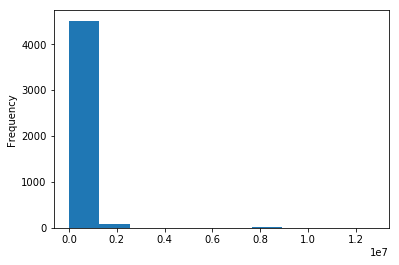

In [280]:
#land value
landval = hedonic_db['landval'].dropna()

hist,bin_edges = np.histogram(landval)
print(hist, bin_edges)

#minimum = min(landval)
#print(minimum)
#maximum = max(landval)
#print(maximum)

hedonic_db['landval'].dropna().plot.hist(range=[np.min(landval), np.max(landval)])



/Users/d/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


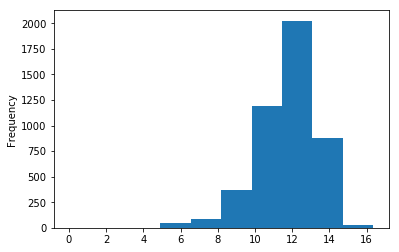

In [281]:
#log transform and replot
ln_landval = np.log(landval)

ln_landval.plot.hist(range=[0, np.max(ln_landval)])

So it looks more normally distributed on a log scale so lets add it to the dataframe

In [282]:
hedonic_db['ln_landval'] = np.log(hedonic_db['landval'])


/Users/d/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Lets see how correlated the values are before we try and regress them.

In [283]:
hedonic_db.corr()

,landval,ll_gisacre,water_productivity,min_avail_water,min_water_rev,ln_landval
landval,1.000000,0.543984,0.337154,0.344102,0.380591,0.550926
ll_gisacre,0.543984,1.000000,0.501622,0.612042,0.567883,0.621474
water_productivity,0.337154,0.501622,1.000000,-0.093656,0.817632,0.319104
min_avail_water,0.344102,0.612042,-0.093656,1.000000,0.111864,0.410740
min_water_rev,0.380591,0.567883,0.817632,0.111864,1.000000,0.294563
ln_landval,0.550926,0.621474,0.319104,0.410740,0.294563,1.000000


So no correlations that would suggest we shouldnt be using these variables. Next up is to try a simple, flawed model to wrap our heads around the results. We can go back and look at feature engineering and comparing log transformations

In [285]:
# for the purposes of this first run we arent going to interpolate nan values, just drop them all 
hedonic_db = hedonic_db.dropna()
hedonic_db =hedonic_db[~hedonic_db.isin([np.nan, np.inf, -np.inf]).any(1)]

Now we are going to run a quick regression

In [286]:
y = hedonic_db['landval']
y_ln = hedonic_db['ln_landval']



X = hedonic_db[['ll_gisacre', 'min_water_rev', 'min_avail_water']]



In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ln, test_size=0.2, random_state=1)

In [288]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [289]:
ols = LinearRegression()
ols.fit(X_train, y_train)

print("R-squared:", ols.score(X_train, y_train))
print("Intercept:", ols.intercept_)
print("Coefficients:", ols.coef_)

print("\n================ SUMMARY TABLE WITH P-VALUES =================")
xlabels = X.columns
stats.summary(ols, X, y_ln, xlabels)

R-squared: 0.3866437762083227
Intercept: 11.726601164994396
Coefficients: [ 1.00894131 -0.13474559  0.05565639]

================ SUMMARY TABLE WITH P-VALUES =================
Residuals:
    Min       1Q   Median        3Q       Max
-22.881  11.5858  41.6579  131.0913  759.9252


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       11.726601    3.396373   3.4527  0.000561
ll_gisacre        1.008941    0.026930  37.4646  0.000000
min_water_rev    -0.134746    0.007540 -17.8707  0.000000
min_avail_water   0.055656    0.008596   6.4747  0.000000
---
R-squared:  -12367.25063,    Adjusted R-squared:  -12376.59457
F-statistic: -1323.56 on 3 features


In [290]:

# Collect the coefficients
df_ols_coef = pd.DataFrame(ols.coef_, index=X_train.columns, columns=['Coefficients'])
df_ols_coef['Coef_abs'] = df_ols_coef.Coefficients.abs()

In [291]:
predictions_train = ols.predict(X_train)
predictions_test = ols.predict(X_test)

In [292]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(ols, X_train, y_train, cv=5)

print('Training Score:', ols.score(X_train, y_train))
print('Cross validation scores:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', ols.score(X_test, y_test))

Training Score: 0.3866437762083227
Cross validation scores: [0.38107038 0.40725112 0.38975423 0.38193484 0.36514595]
Mean cross validation score: 0.3850313043608744
Test Score: 0.36315822963084643


In [293]:
# Shuffled 5-fold cross validation scores are rather similar
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores_shuffled = cross_val_score(ols, X_train, y_train, cv=kf)

print('Shuffled cross validation score:', cv_scores_shuffled)
print('Mean shuffled cross validation score:', cv_scores_shuffled.mean())

Shuffled cross validation score: [0.37542225 0.41360178 0.41567562 0.35553113 0.37030095]
Mean shuffled cross validation score: 0.38610634489515094


In [294]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_test)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, predictions_test))**0.5)

Mean Squared Error: 1.692023002112822
Root Mean Squared Error: 1.3007778450268985


In [295]:
ols_residuals_0609 = (y_train - predictions_train)
ols_residuals_0609.describe()

count    3.180000e+03
mean    -3.463337e-16
std      1.224673e+00
min     -6.388411e+00
25%     -4.883032e-01
50%      2.904494e-01
75%      6.478201e-01
max      3.990116e+00
Name: ln_landval, dtype: float64

In [296]:
print("Skew:", ols_residuals_0609.skew())
print("Kurtosis:", ols_residuals_0609.kurtosis())
stat, p = shapiro(ols_residuals_0609)
print('Shapiro-Wilk test on normality=%.3f, p=%.3f' % (stat, p))

Skew: -1.3017343322443
Kurtosis: 3.106801088866016
Shapiro-Wilk test on normality=0.911, p=0.000


In [310]:
stats.probplot(ols_residuals_0609, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot training set");

AttributeError: module 'regressors.stats' has no attribute 'probplot'

In [298]:
print(X_train)

      ll_gisacre  min_water_rev  min_avail_water
0       0.321394      -0.206109         0.467731
1      -0.318335      -0.214427        -0.439718
2       0.370298      -0.226153        -0.102910
3      -0.399760      -0.244889        -0.198245
4      -0.661221      -0.248131        -0.449308
...          ...            ...              ...
3175    0.352855       0.029239        -0.411544
3176   -0.614618      -0.245667        -0.420446
3177    1.773099       1.320816        -0.351927
3178   -0.192752      -0.229290         0.603453
3179    3.534348       4.386345        -0.277995

[3180 rows x 3 columns]


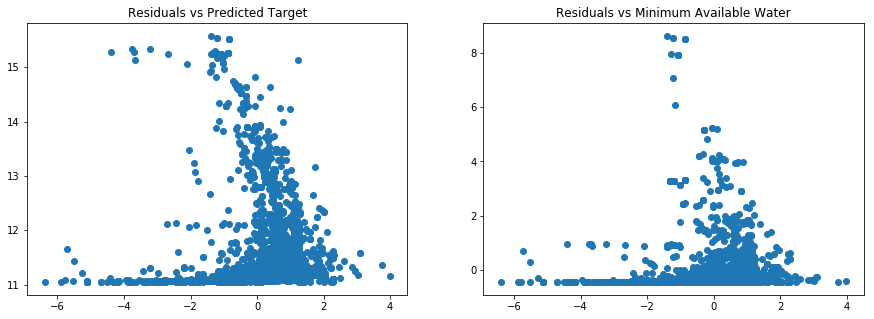

In [299]:

# Plotting the OLS residuals against the predicted-y and 'min_avail_water'. The residuals appear well-behaved
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].scatter(ols_residuals_0609, predictions_train)
ax[0].set_title('Residuals vs Predicted Target', fontsize=12)

ax[1].scatter(ols_residuals_0609, X_train.min_avail_water)
ax[1].set_title('Residuals vs Minimum Available Water', fontsize=12);

In [300]:
# Ridge Cross-Validation
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Best Ridge alpha: 0.3593813663804626
Training score: 0.38664375982781907
Test Score: 0.36315425294527526


In [301]:
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()

In [302]:
# Confirmed similar to the above Ridge CV scores
ridge_mod = Ridge(alpha=2.78)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.38116417 0.40714431 0.3896653  0.38195207 0.3652297 ]
Mean cross-validated training score: 0.3850311097525466
Training Score: 0.3866428027355744
Test Score: 0.36312685789702015


In [303]:
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.000774263682681127
Training score: 0.3866425393847578
Test Score: 0.3631538012638147


In [304]:
df_lasso_coef = pd.DataFrame(lasso_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_lasso_coef['Coef_abs'] = df_lasso_coef.Coefficients.abs()

In [305]:
coef = pd.concat([df_ols_coef['Coefficients'], df_ridge_coef['Coefficients'], df_lasso_coef['Coefficients']])
coef = pd.DataFrame(coef)
coef.reset_index(level=0, inplace=True)
coef.columns = ['variable', 'coefficient']


In [215]:
coef.loc[0:2, "model"] = "ols"
coef.loc[3:5, "model"] = "ridge"
coef.loc[6:9, "model"] = "lasso"